Code for producing the plots from the probability and stats units. 

TODO: code is currently very sloppy! Must go back and fix eventually, and add text and context to the pictures. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys

# this makes sure the images don't come out looking muddy on 
# retina displays (which your computer probably uses)
# Update 07/18/22: got retina working with updates thanks to 
# https://stackoverflow.com/questions/54312924/what-is-matplotlibs-retina-display-mode
%matplotlib inline
%config InlineBackend.figure_format='retina'

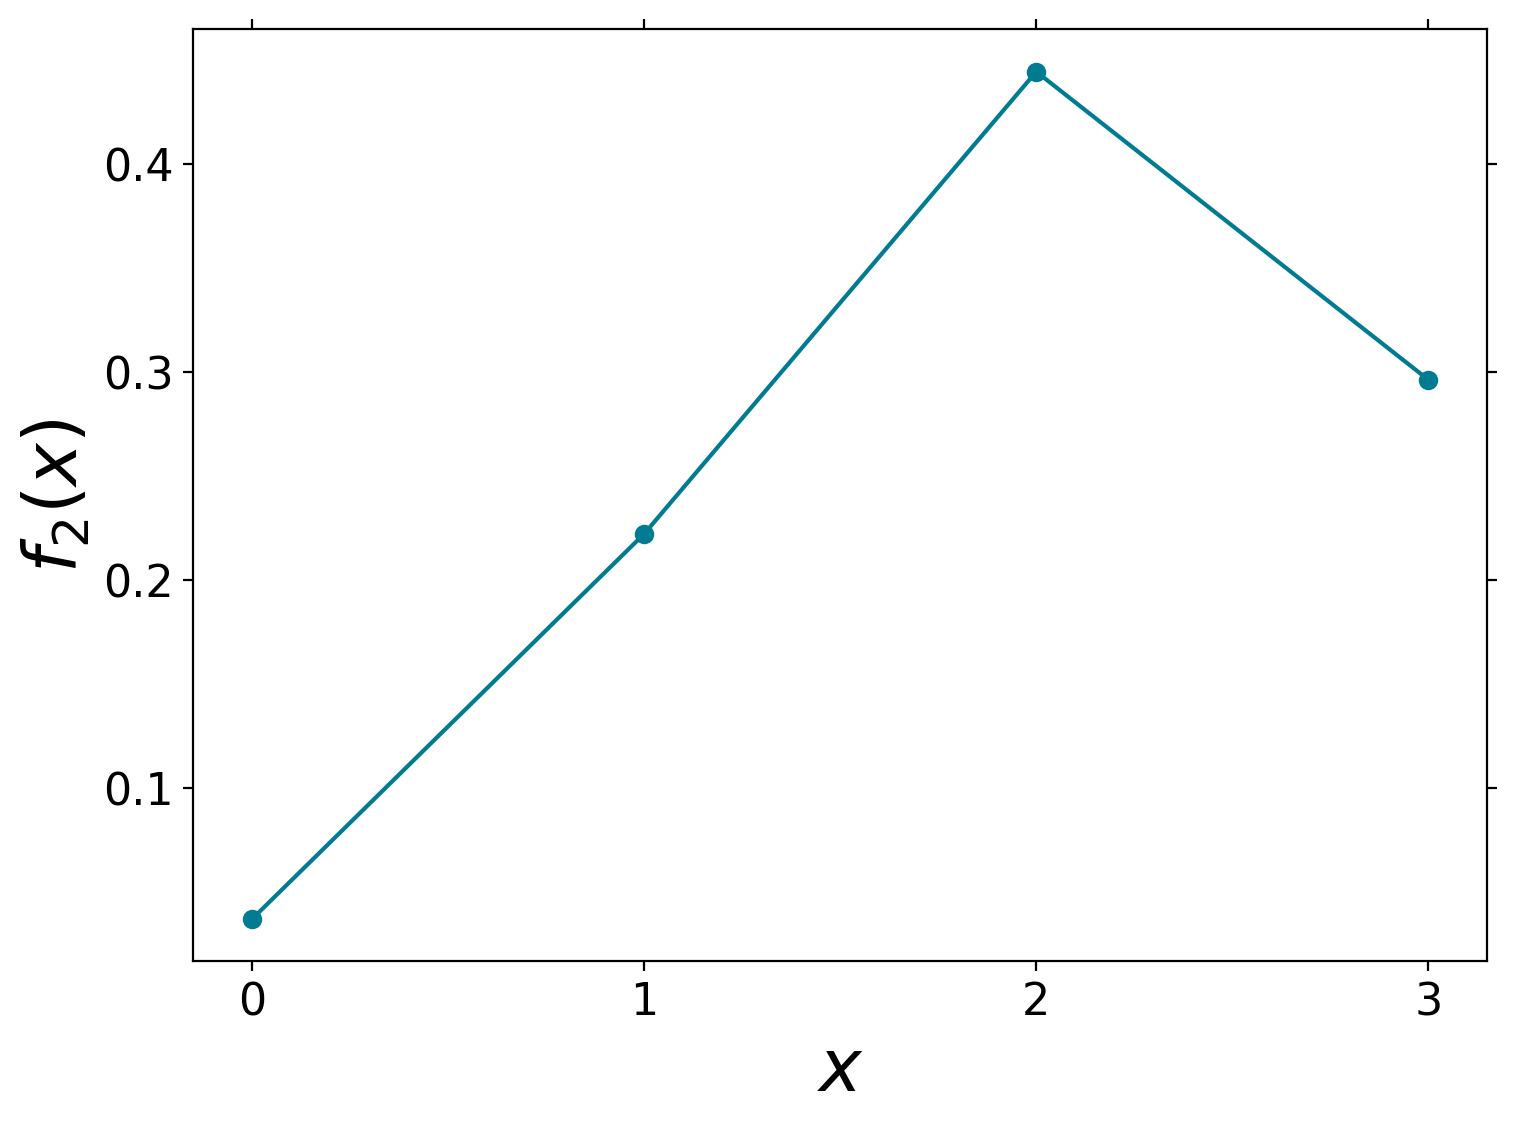

In [2]:
# initialize figure 
fig, ax =plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xx = np.array([0,1,2,3])

p = 2./3.

q= 1.-p

yy = np.array([q**3, 3.*p*q**2, 3*q*p**2, p**3])

plt.plot(xx, yy, '-o', color='xkcd:ocean')

plt.xlabel(r"$x$", fontsize=26, color = 'k')
plt.ylabel(r"$f_2(x)$", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
figname = 'binom3_dist_p=%.3f' % (p) + '.png'
plt.savefig(figname, dpi=600)
    
plt.show()

In [3]:
## Large N binomial distribution

In [4]:
from scipy.special import comb

def binom_distr(N,p):
    out = np.zeros(N+1, dtype=float)
    
    for k in range(0,N+1):
        
        out[k] = comb(N, k) * (p**k) * ((1.-p)**(N-k))
        
    return out

In [5]:
from scipy.special import factorial 

def poiss(N, mu):
    
    out = np.zeros(N+1, dtype=float)
    
    for k in range(0,N+1):
        
        out[k] = np.exp(-mu) * (mu**k) / factorial(k)
        
    return out

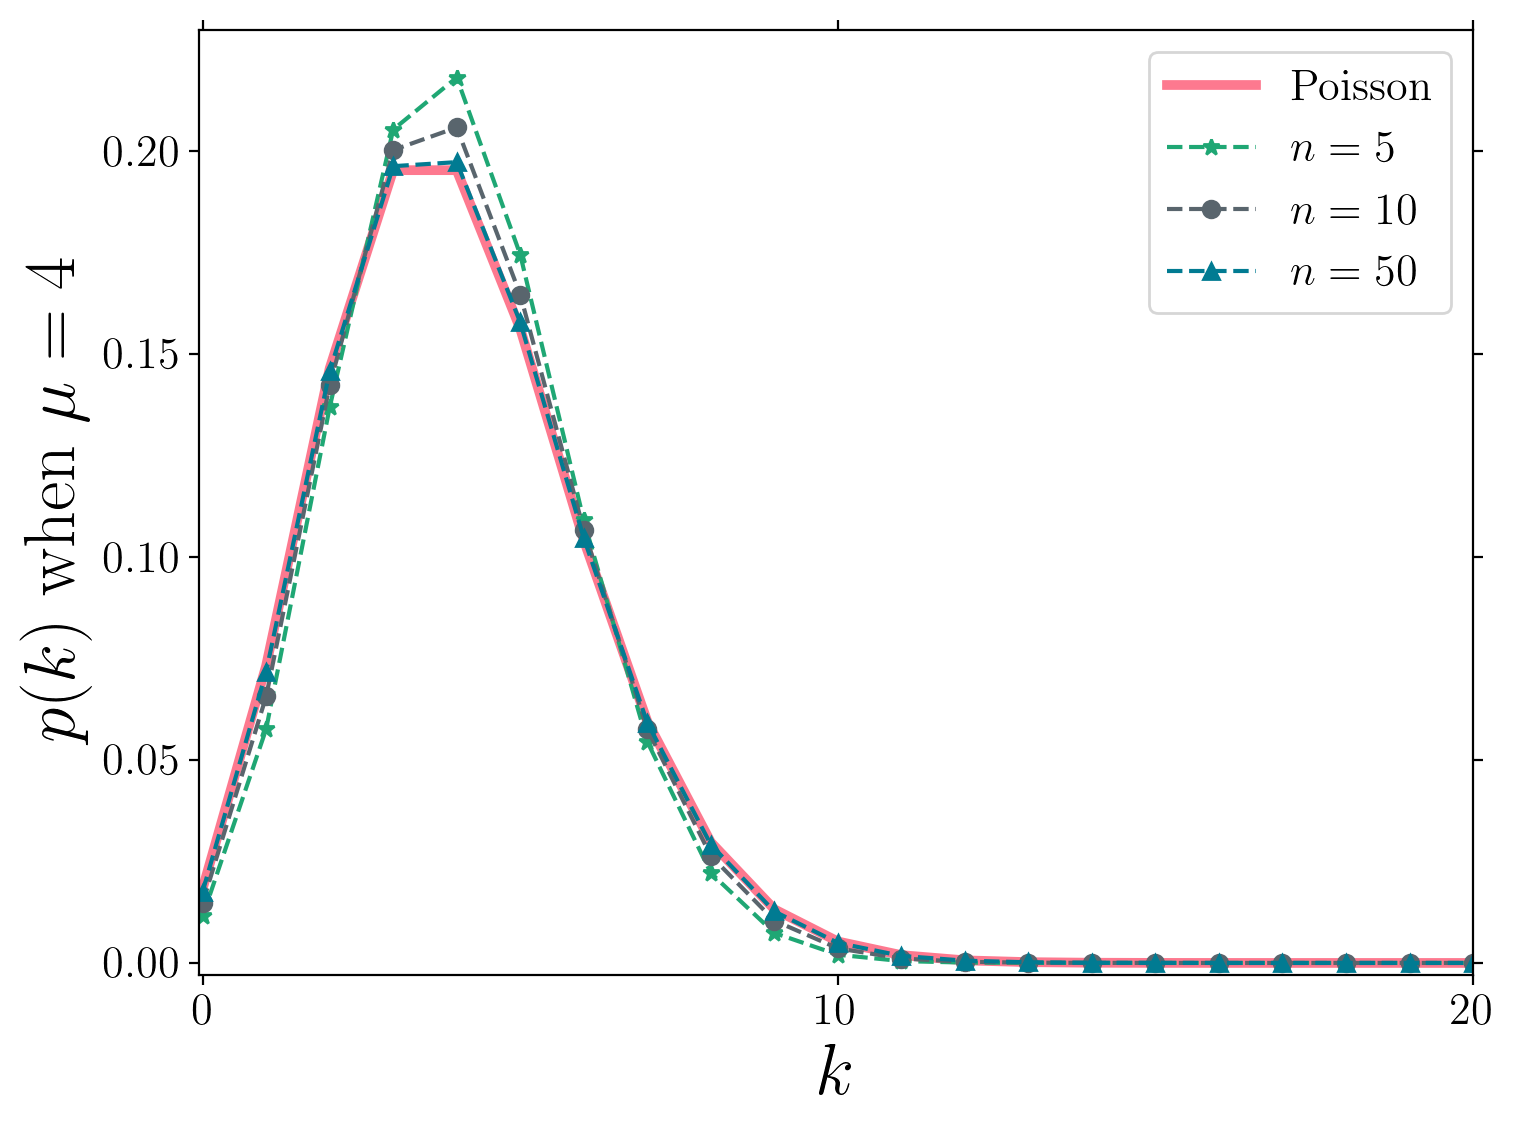

In [6]:
# initialize figure 
fig, ax =plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

######################

mu = 4. 

N = 40

kk = np.arange(0,N+1)

zz = poiss(N, mu)

plt.plot(kk, zz, '-', color='xkcd:carnation', label='Poisson', linewidth=3.5)

##################
n = 5.

p = 1/n

N = int(mu*n)

kk = np.arange(0,N+1)

yy = binom_distr(N, p)

plt.plot(kk, yy, '--*', color='xkcd:jade', label='$n=5$')

######################################

n = 10.

p = 1/n

N = int(mu*n)

kk = np.arange(0,N+1)

yy = binom_distr(N, p)

plt.plot(kk, yy, '--o', color='xkcd:slate gray', label='$n=10$')

######################################

n = 50.

p = 1/n

N = int(mu*n)

kk = np.arange(0,N+1)

yy = binom_distr(N, p)

plt.plot(kk, yy, '--^', color='xkcd:ocean', label='$n=50$')

plt.xlabel(r"$k$", fontsize=26, color = 'k')
plt.ylabel(r"$p(k)$ when $\mu=4$", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)

plt.xlim([-0.05, 20.])
plt.ylim([-0.003, 0.23])

ax.legend(fontsize=16)

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
#figname = 'binom_to_poisson.png'
#plt.savefig(figname, dpi=600)
    
plt.show()

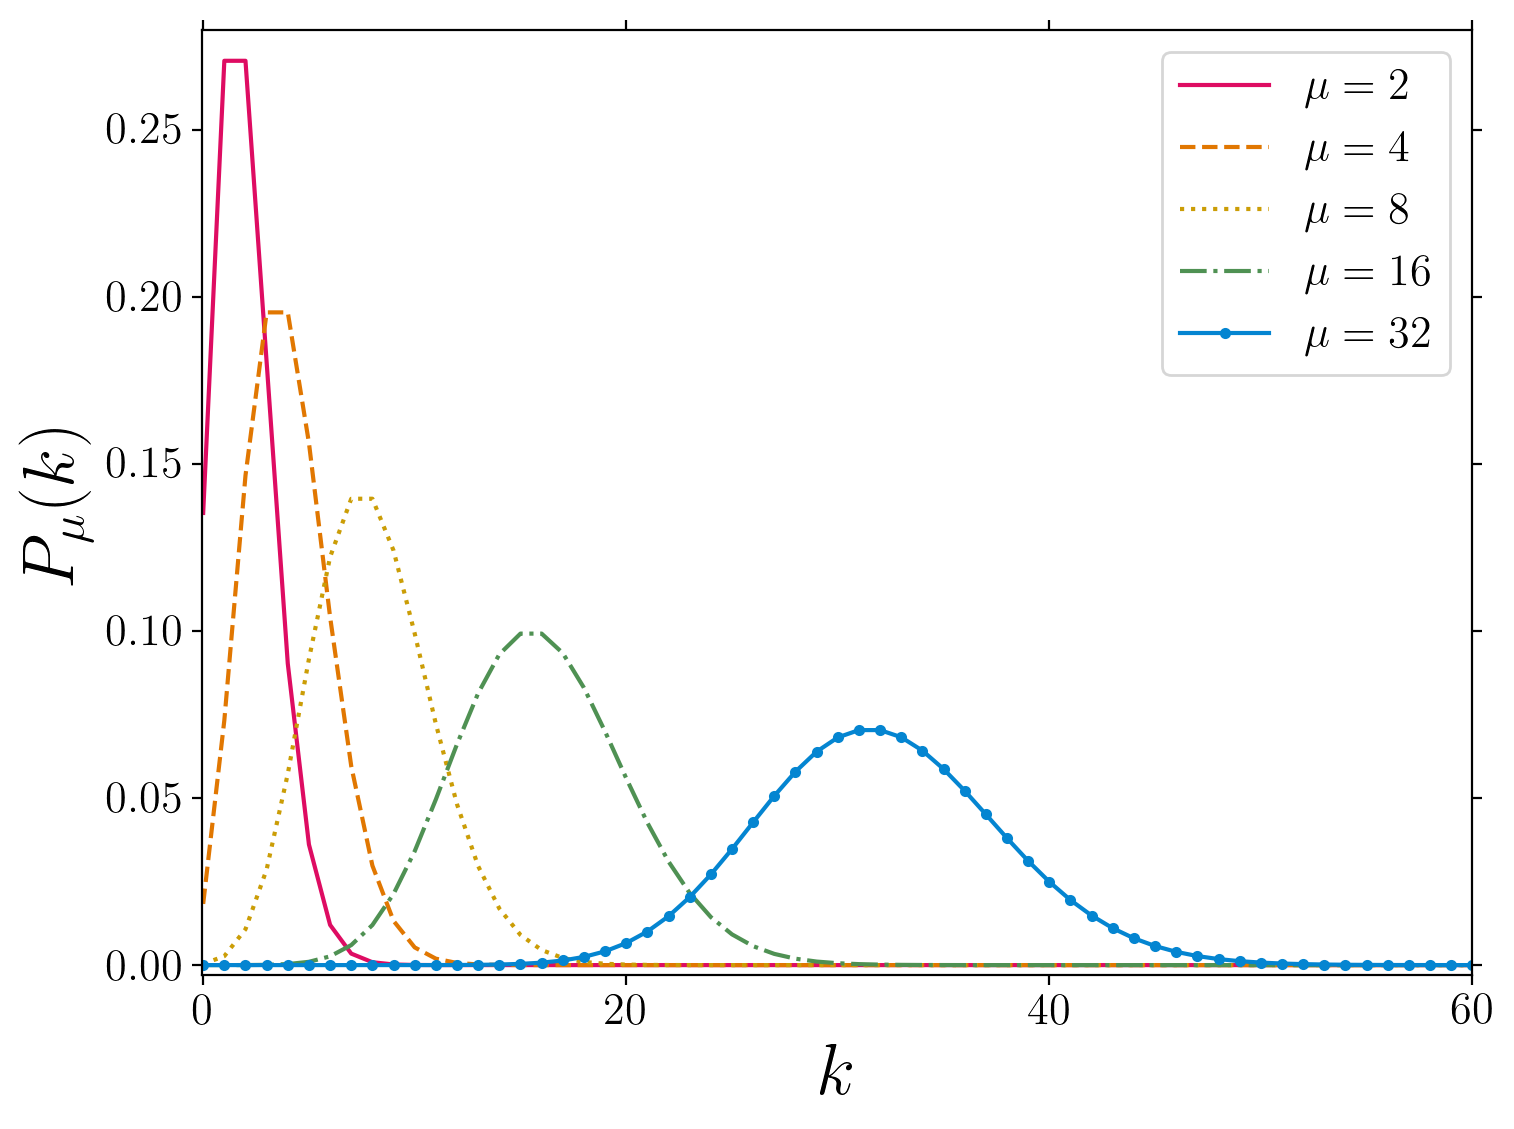

In [7]:
# initialize figure 
fig, ax =plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

N = 60

kk = np.arange(0,N+1)

######################
mu = 2. 

zz = poiss(N, mu)

plt.plot(kk, zz, '-', color='xkcd:cerise', label='$\mu=2$', linewidth=1.5)
##################

######################
mu = 4. 

zz = poiss(N, mu)

plt.plot(kk, zz, '--', color='xkcd:pumpkin', label='$\mu=4$', linewidth=1.5)

#####################
mu = 8. 

zz = poiss(N, mu)

plt.plot(kk, zz, ':', color='xkcd:yellow ochre', label='$\mu=8$', linewidth=1.5)

#####################
mu = 16. 

zz = poiss(N, mu)

plt.plot(kk, zz, '-.', color='xkcd:light forest green', label='$\mu=16$', linewidth=1.5)

#####################
mu = 32. 

zz = poiss(N, mu)

plt.plot(kk, zz, '.-', color='xkcd:cerulean', label='$\mu=32$', linewidth=1.5)


plt.xlabel(r"$k$", fontsize=26, color = 'k')
plt.ylabel(r"$P_{\mu}(k)$", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)

plt.xlim([-0.05, N])
plt.ylim([-0.003, 0.28])

ax.legend(fontsize=16)

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
figname = 'poisson_different_mu.png'
plt.savefig(figname, dpi=600)
    
plt.show()

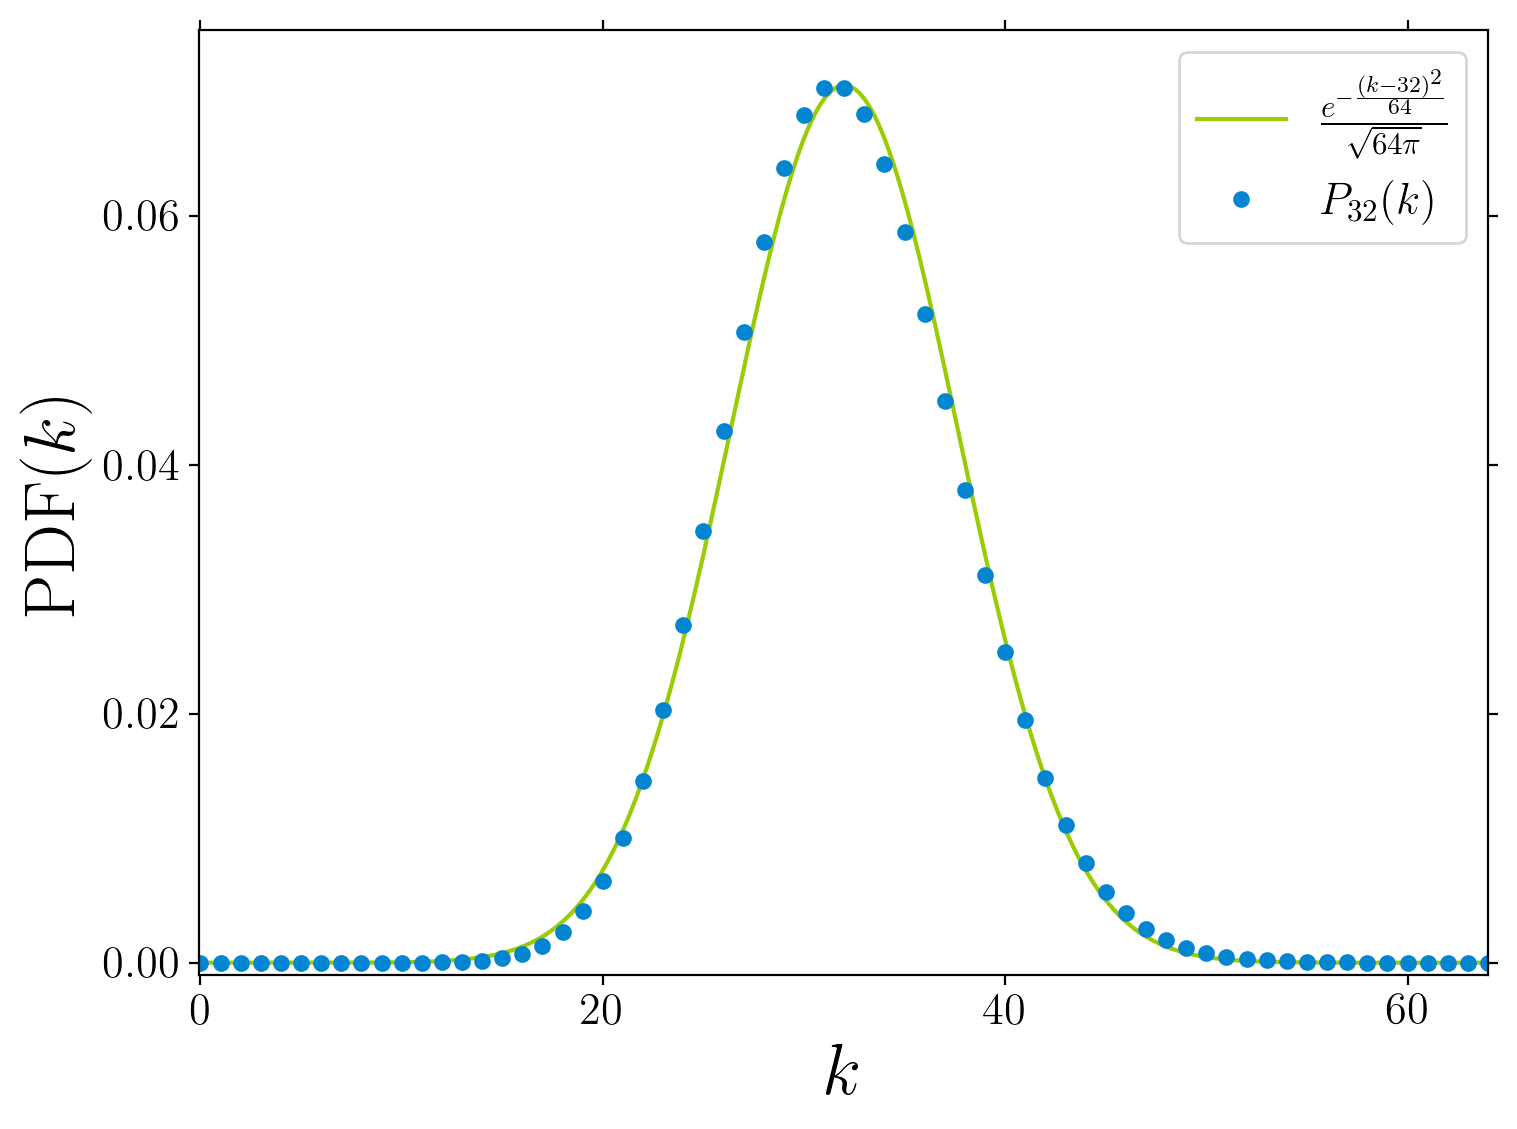

In [8]:
# initialize figure 
fig, ax =plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

N = 64

"""
######################
n = 10

p = 1/n

N = int(mu*n)

kk = np.arange(0,N+1)

yy = binom_distr(N, p)

plt.plot(kk, yy, '^', color='xkcd:watermelon', label=r'Bi$\left(64, \frac12\right)$')
"""
##################### 

xx = np.linspace(0,64, 500)

zzG = np.exp(-((xx-mu)**2)/(2.*mu))/np.sqrt(2.*np.pi*mu)

plt.plot(xx, zzG, '-', color='xkcd:slime green', label=r'$\frac{e^{-\frac{(k-32)^2}{64}}}{\sqrt{64\pi}}$', linewidth=1.5)

kk = np.arange(0,N+1)

#####################
mu = 32. 

zz = poiss(N, mu)

plt.plot(kk, zz, '.', color='xkcd:cerulean', label=r'$P_{32}(k)$', markersize=10)

plt.xlabel(r"$k$", fontsize=26, color = 'k')
plt.ylabel(r"PDF$(k)$", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)

plt.xlim([-0.05, N])
plt.ylim([-0.001, 0.075])

ax.legend(fontsize=16)

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
figname = 'poisson_gaussian_approx.png'
plt.savefig(figname, dpi=600)
    
plt.show()

In [9]:
### Random Walk on Z stuff

In [10]:
from scipy.special import comb

def U(m,n):
    
    if n%2 == 0 and m%2 != 0:
        
        out = 0.
        
    elif n%2 != 0 and m%2 ==0:
        
        out = 0. 
    
    else: 
        
        out = (2.**(-n))*comb(n, 0.5*(n-m))
    
    return out

In [11]:
print(U(0,1))

0.0


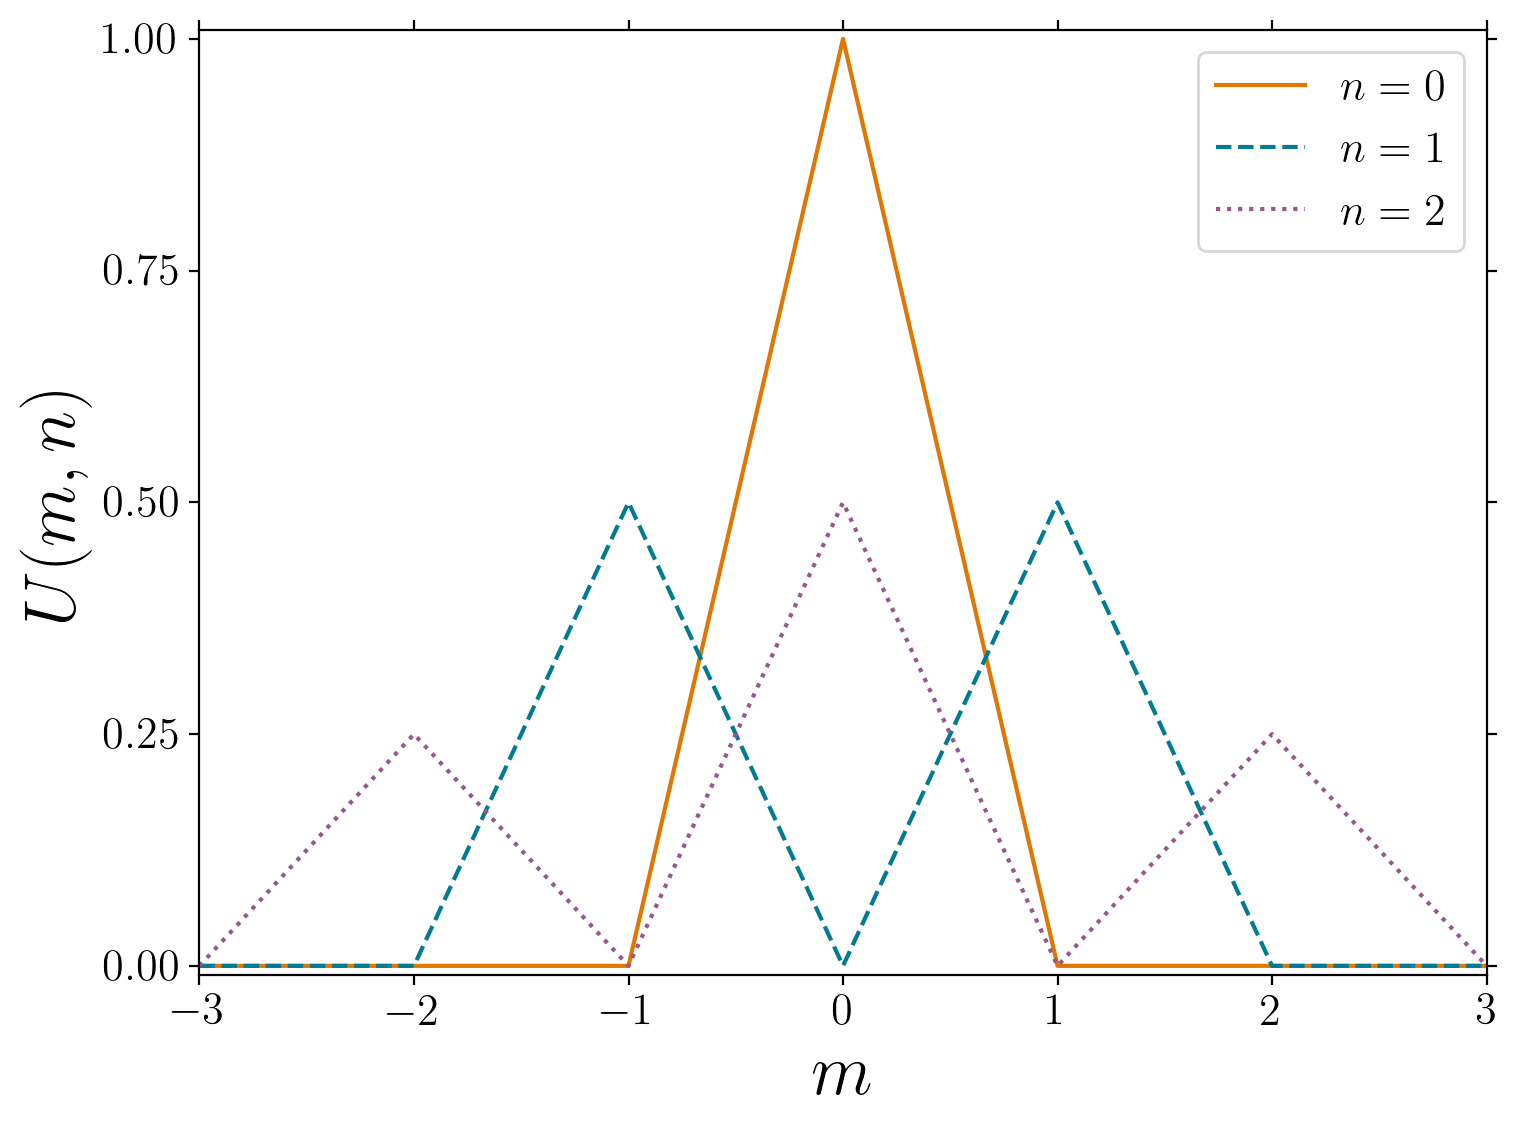

In [12]:
# initialize figure 
fig, ax =plt.subplots()

nmax = 3

xx = np.arange(-nmax,nmax+1)

colors = ['xkcd:pumpkin', 'xkcd:ocean', 'xkcd:purpleish', 'xkcd:jade green', 'xkcd:carnation']
styles= ['solid', 'dashed', 'dotted', 'dashdot']
labels=['$n=0$', '$n=1$', '$n=2$', '$n=3$']

for n in np.arange(0, nmax):
    
    yy = np.zeros(2*nmax+1, dtype=float)
        
    for j in range(2*nmax+1):
        
        y = U(xx[j], int(n))
                
        yy[j] = y
                        
    plt.plot(xx, yy, color=colors[n], linestyle=styles[n], label=labels[n])
    
plt.ylim([-0.01,1.01])
plt.xlim([-nmax, nmax])

ax.legend(fontsize=16)

plt.xlabel(r"$m$", fontsize=26, color = 'k')
plt.ylabel(r"$U(m,n)$", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=5)
ax.locator_params(axis='x', nbins=6)

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
figname = 'rw_distr_rough' + '.png'
plt.savefig(figname, dpi=600)
    
plt.show()


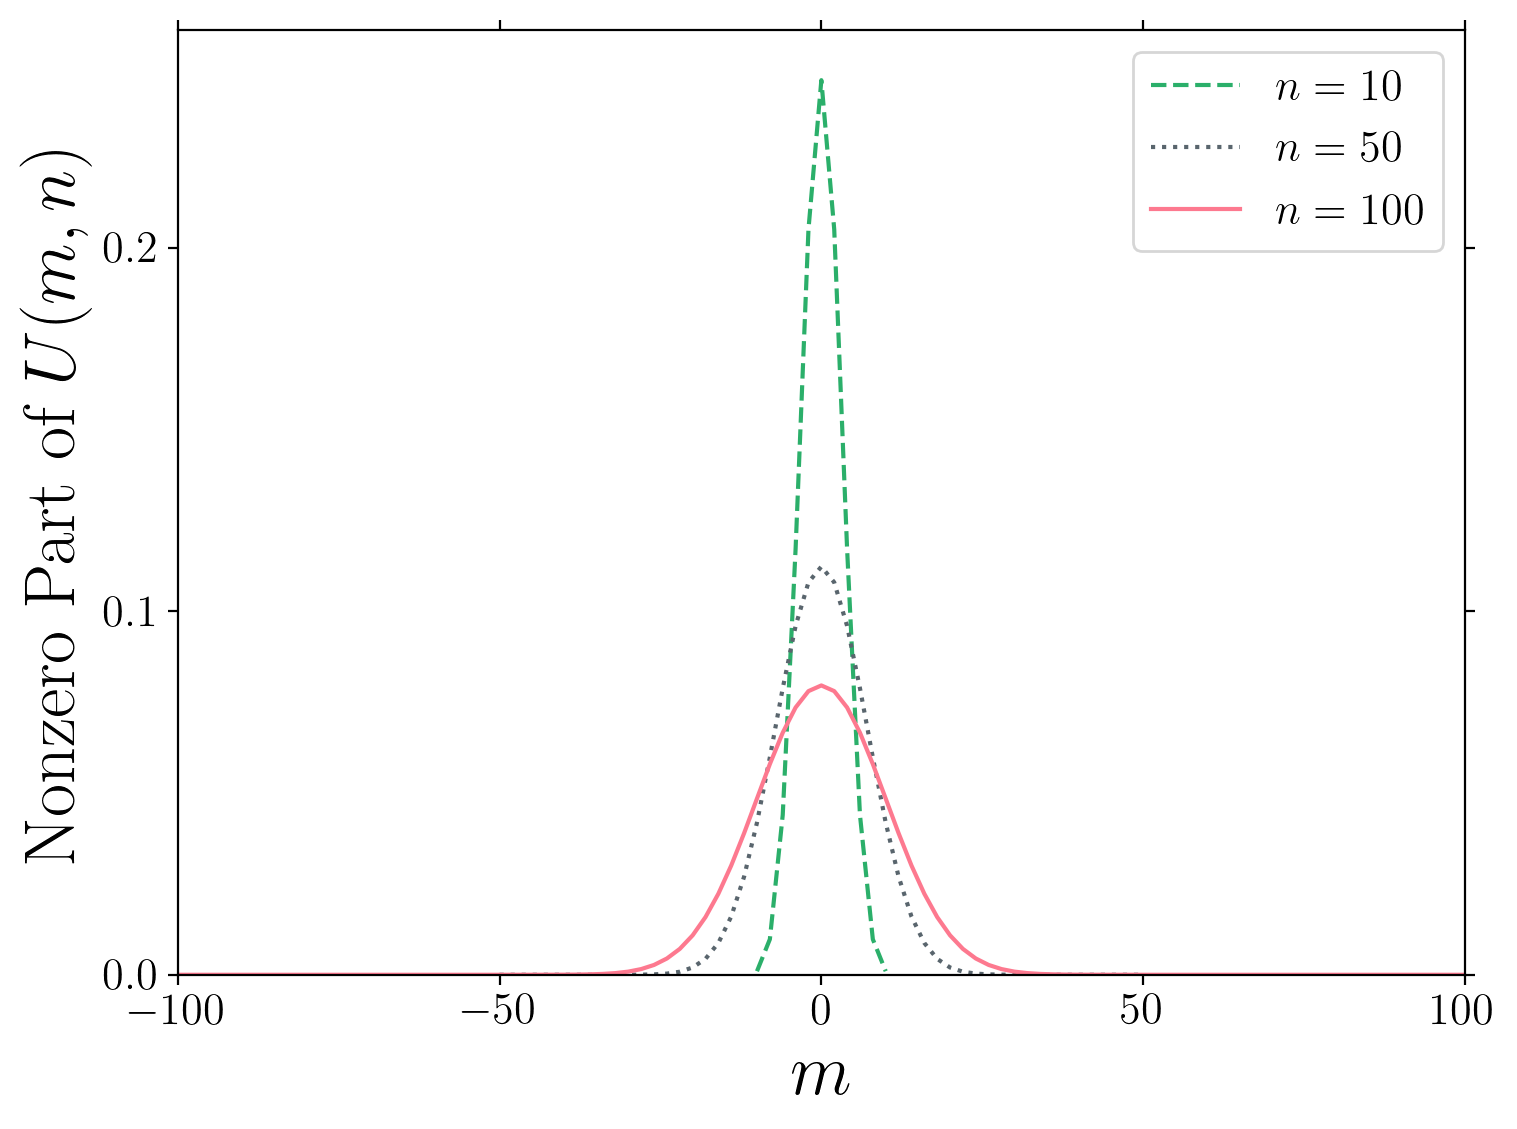

In [13]:
# initialize figure 
fig, ax =plt.subplots()

N = 100
M = 50
n = 10

xx = np.arange(-N,N+1)

yyn = np.zeros(2*N+1, dtype=float)

yyM =  np.zeros(2*N+1, dtype=float)

yyN = np.zeros(2*N+1, dtype=float)

for j in range(2*N+1):
        
    yn = U(xx[j], n)
    
    yM = U(xx[j], M)
    
    yN = U(xx[j], N)
                        
    yyn[j] = yn
    
    yyM[j] = yM
    
    yyN[j] = yN
                            
plt.plot(xx[yyn!=0], yyn[yyn!=0], color='xkcd:jade green', linestyle='dashed', label='$n=10$')
   
plt.plot(xx[yyM!=0], yyM[yyM!=0], color='xkcd:slate grey', linestyle='dotted', label='$n=50$')
    
plt.plot(xx[yyN!=0], yyN[yyN!=0], color='xkcd:carnation', linestyle='solid', label='$n=100$')    
    
plt.ylim([-0.0001,0.25+.01])
plt.xlim([-N, N])

ax.legend(fontsize=16)

plt.xlabel(r"$m$", fontsize=26, color = 'k')
plt.ylabel(r"Nonzero Part of $U(m,n)$", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=5)
ax.locator_params(axis='x', nbins=4)

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
#figname = 'rw_distr_longtime' + '.png'
#plt.savefig(figname, dpi=600)
    
plt.show()

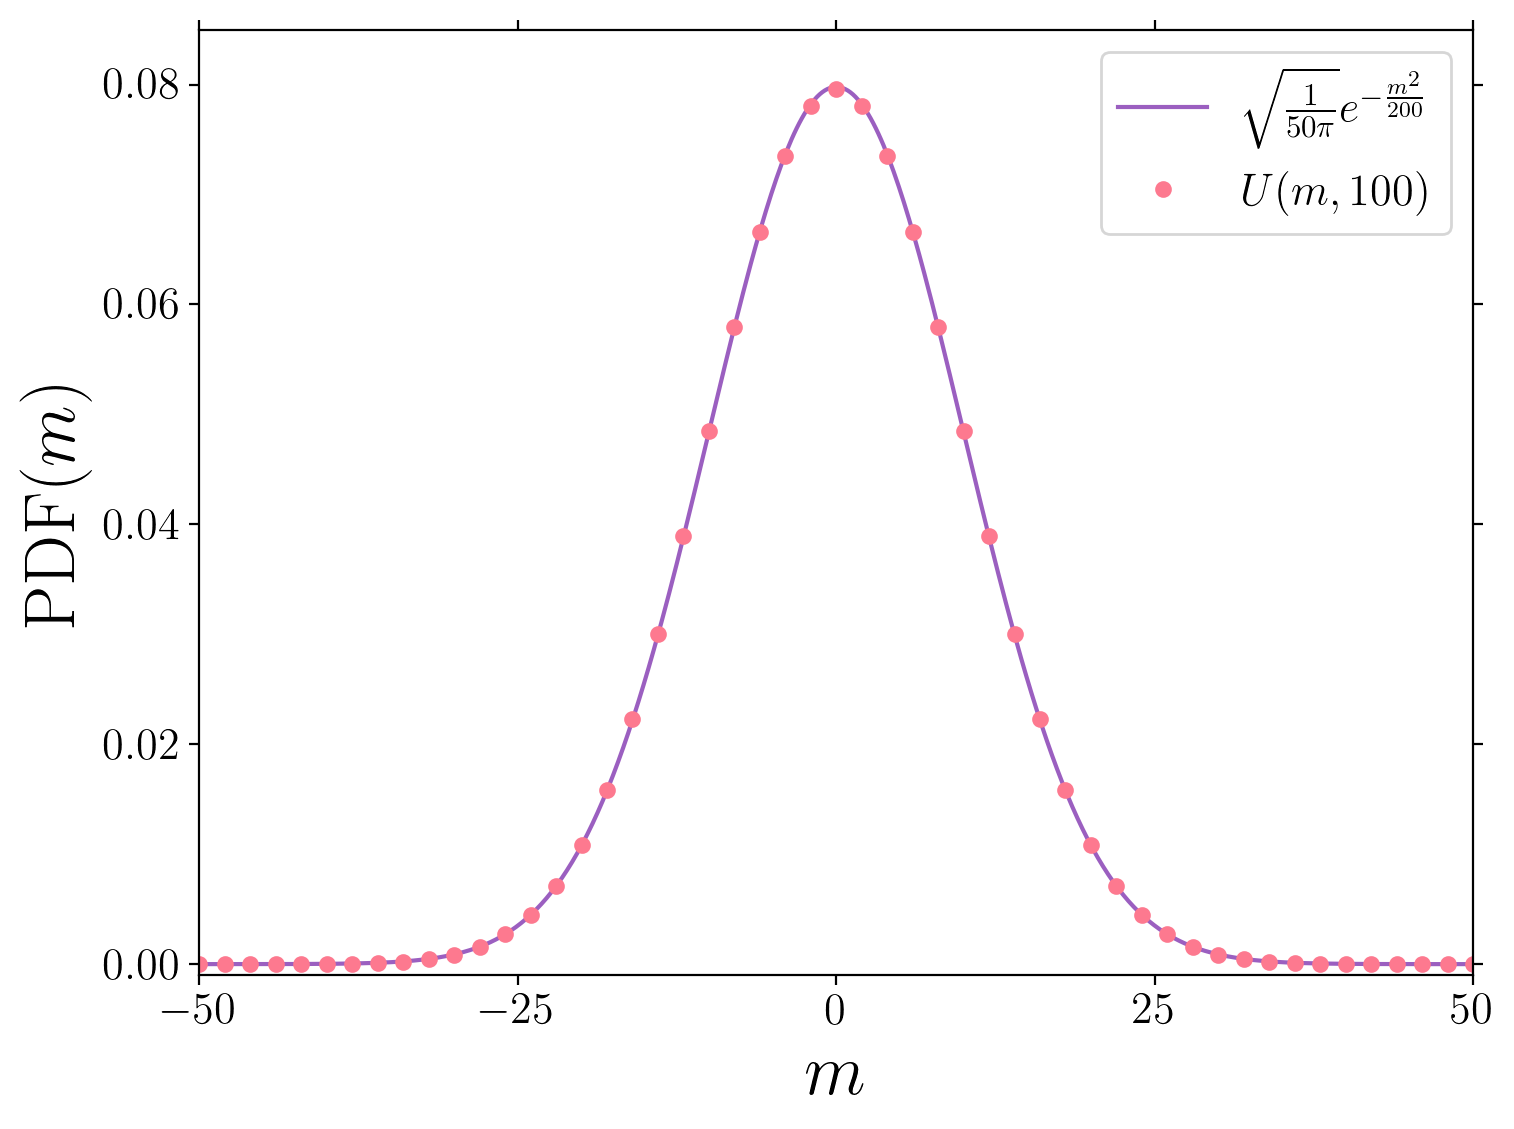

In [14]:
# initialize figure 
fig, ax =plt.subplots()

#Gaussian approx
xxG = np.linspace(-50,50, 500)
yyG = np.exp(-(xxG)**2/(2*N))/(np.sqrt(0.5*np.pi*N))

plt.plot(xxG, yyG,'-', color='xkcd:amethyst', label=r'$\sqrt{\frac{1}{50\pi}}e^{-\frac{m^2}{200}}$', linewidth=1.5)

# large N exact PDF
plt.plot(xx[yyN!=0], yyN[yyN!=0], 'o', color='xkcd:carnation', markersize=5, label='$U(m,100)$')    

plt.xlabel(r"$m$", fontsize=26, color = 'k')
plt.ylabel(r"PDF$(m)$", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=5)
ax.locator_params(axis='x', nbins=4)

plt.ylim([-0.001,0.085])
plt.xlim([-50, 50])

ax.legend(fontsize=16)

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
figname = 'rw_distr_gaussian_approx' + '.png'
plt.savefig(figname, dpi=600)
    
plt.show()

In [15]:
#### Stirling Approx

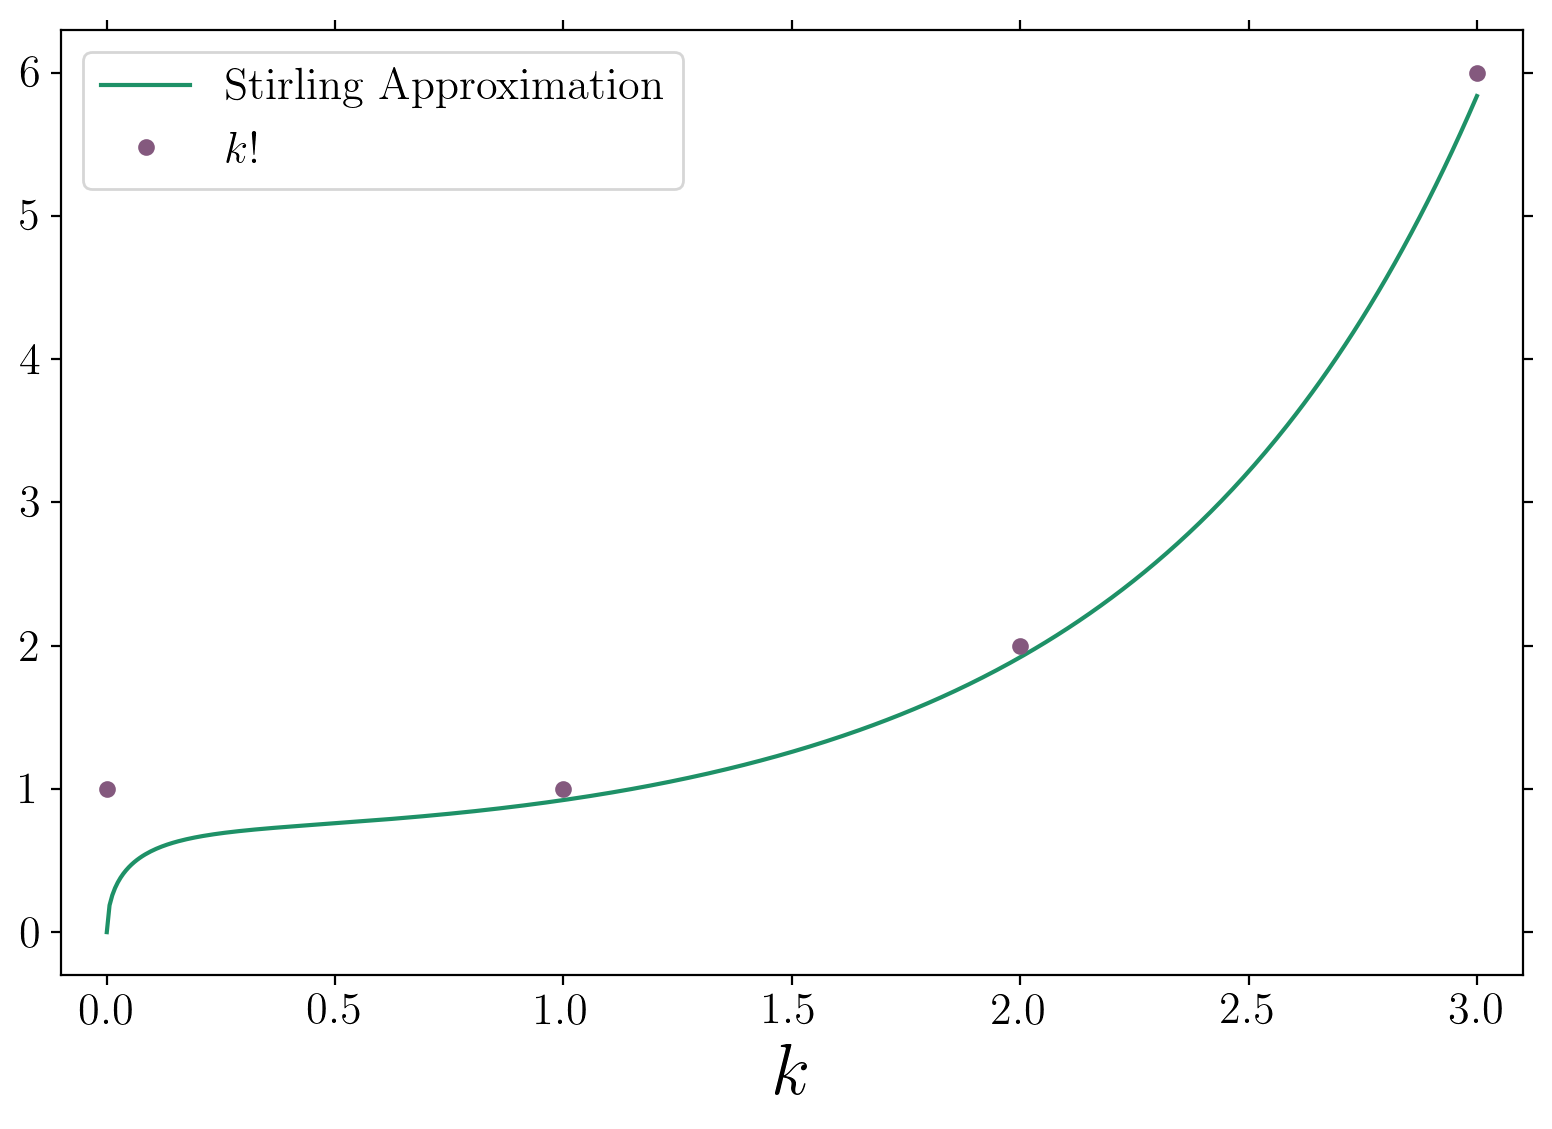

In [16]:
# initialize figure 
fig, ax =plt.subplots()

nmin = 0
nmax = 3

#Stirling approx
xxG = np.linspace(nmin, nmax, 500, endpoint=True)
yyG = np.exp(-xxG) * (xxG**xxG) *(np.sqrt(2.*np.pi*xxG))

plt.plot(xxG, yyG,'-', color='xkcd:viridian', label=r'Stirling Approximation', linewidth=1.5)

# exact factorial
kk = np.arange(nmin, nmax+1)

yy_exact = factorial(kk)

# for large nmax
#plt.semilogy(kk, yy_exact, 'o', color='xkcd:dull purple', markersize=5, label=r'$k!$')    

# for small nmax
plt.plot(kk, yy_exact, 'o', color='xkcd:dull purple', markersize=5, label=r'$k!$')  

plt.xlabel(r"$k$", fontsize=26, color = 'k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y')
ax.locator_params(axis='x')

#plt.ylim([-0.001,0.085])
plt.xlim([nmin-0.1, nmax+0.1])

ax.legend(fontsize=16)

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
figname = 'stirling_approx_small' + '.png'
plt.savefig(figname, dpi=600)
    
plt.show()

In [17]:
# "fake histogram envelope" for example w/ exam cheating

In [18]:
a1 = 0.85
    
a2 = 0.08
    
mu1 = 55.
    
sigma1 = 3.4
    
mu2 = mu1 + 15. 
    
sigma2 = 1.

def f(x): 
    
    normalization = 1./(np.sqrt(2.*np.pi))
    
    out = (a1/sigma1)*np.exp((-0.5/sigma1**2)*((x-mu1)/(sigma1))**2) + (a2/sigma2)*np.exp((-0.5/sigma2**2)*((x-mu2)/(sigma2))**2)

    out *= 1000*normalization
    
    return out

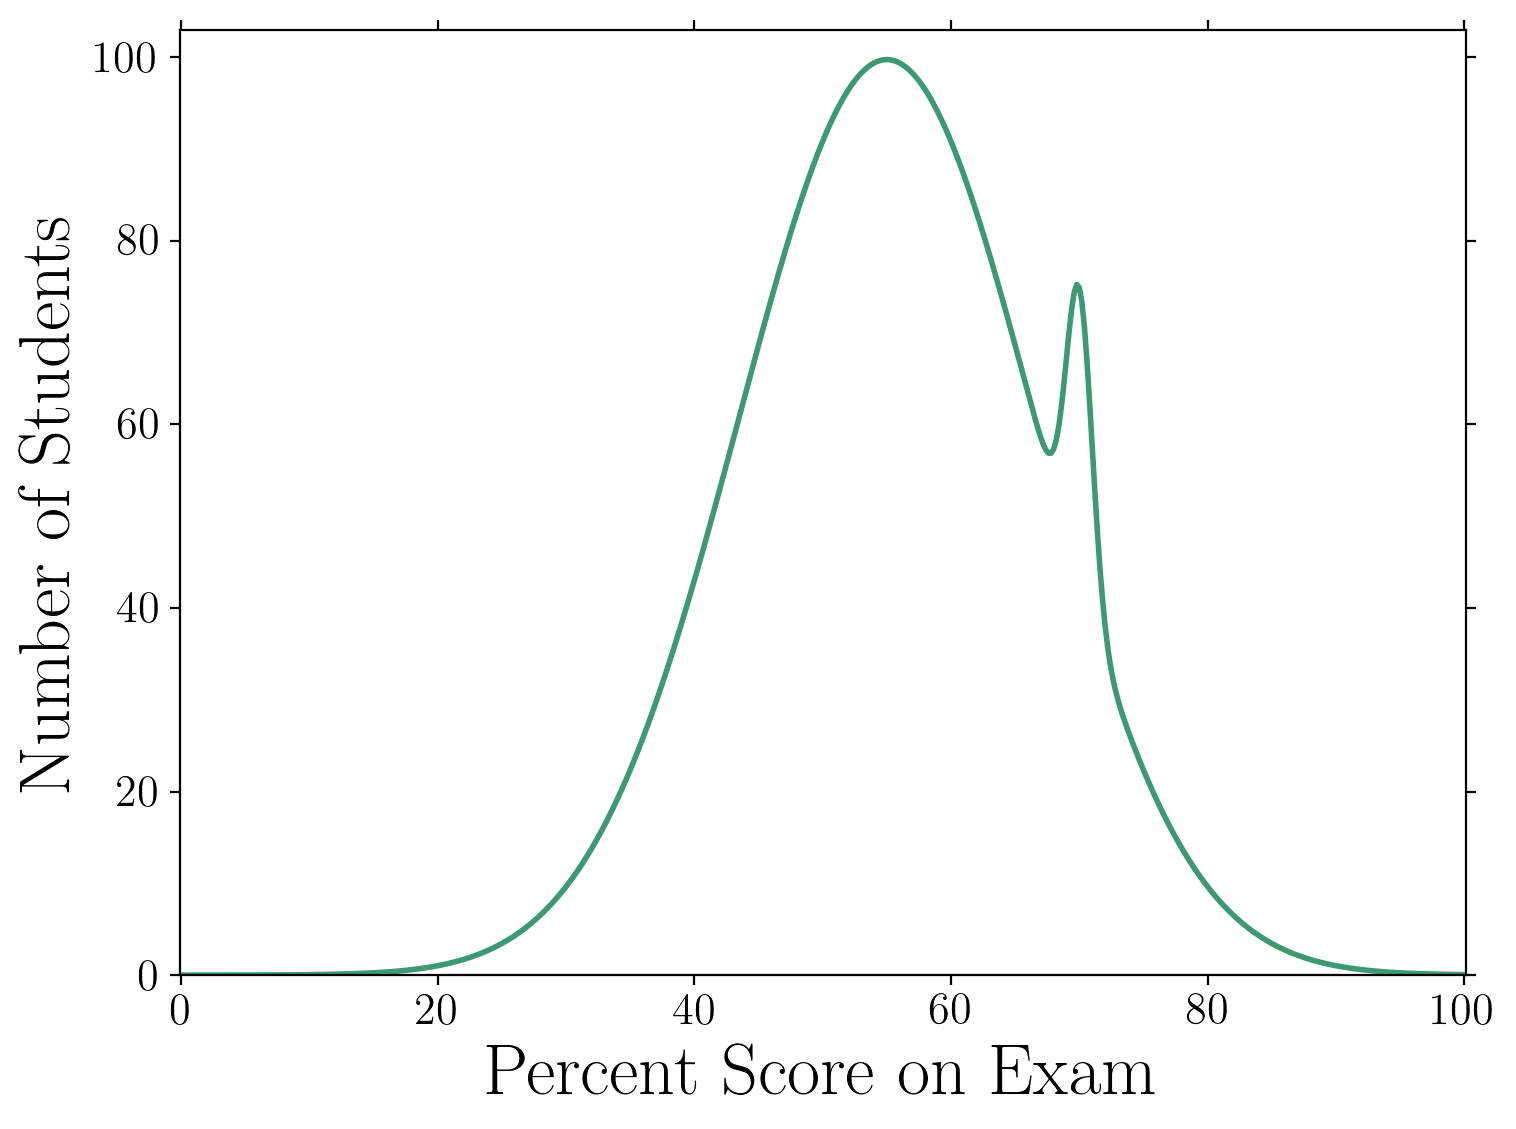

In [19]:
# initialize figure 
fig, ax =plt.subplots()

xx = xx = np.linspace(0,100, num = 501)
plt.plot(xx, f(xx), linestyle='solid', color='xkcd:ocean green', linewidth='2')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y')
ax.locator_params(axis='x')

plt.ylim([-0.001,103])
plt.xlim([-0.1, 100+0.1])

plt.xlabel(r"Percent Score on Exam", fontsize=26, color = 'k')
plt.ylabel(r"Number of Students", fontsize=26, color = 'k')

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
figname = 'test_false_data' + '.png'
plt.savefig(figname, dpi=600)
    
plt.show()